<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Predict_Employee_Attribution_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**: Predict which employee will attribute

Main objectives to employee churn is to try to answer the following questions:

1.How to reduce employee churn ?

2.Why are good employees leaving the company ?

3.Can we predict the employees most likely to leave ?

In this study involved 1470 employees

Most of the employees are in the age between 25-40 years old.

237(16%) employees left the company whereas 1233(84%)
employees remand stay in the company

At age 29 and 31 of the employee will left the company

c/Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...       

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#check for any duplication of data
df[df.duplicated]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<Axes: xlabel='Age', ylabel='Count'>

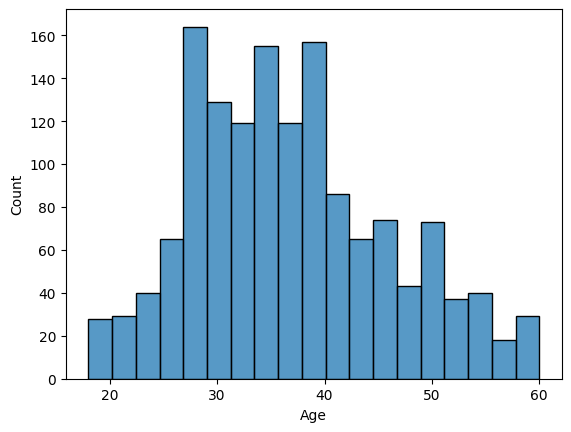

In [ ]:
sns.histplot(df['Age'])  #Most of the employees are in the age between 25-40 years old

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: xlabel='count', ylabel='Attrition'>

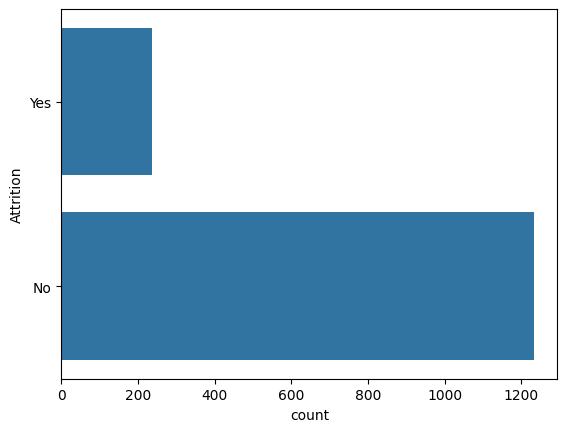

In [ ]:
sns.countplot(df['Attrition'])          # 237 employees left the company whereas 1233 employees remand stay in the company

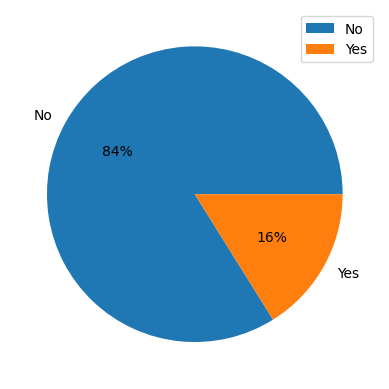

In [ ]:
attribute = df['Attrition'].value_counts()

# Plotting the pie chart
plt.pie(attribute.values, labels=attribute.index, autopct='%.0f%%')

plt.legend()
# Display the pie chart
plt.show()


<Axes: xlabel='Age', ylabel='count'>

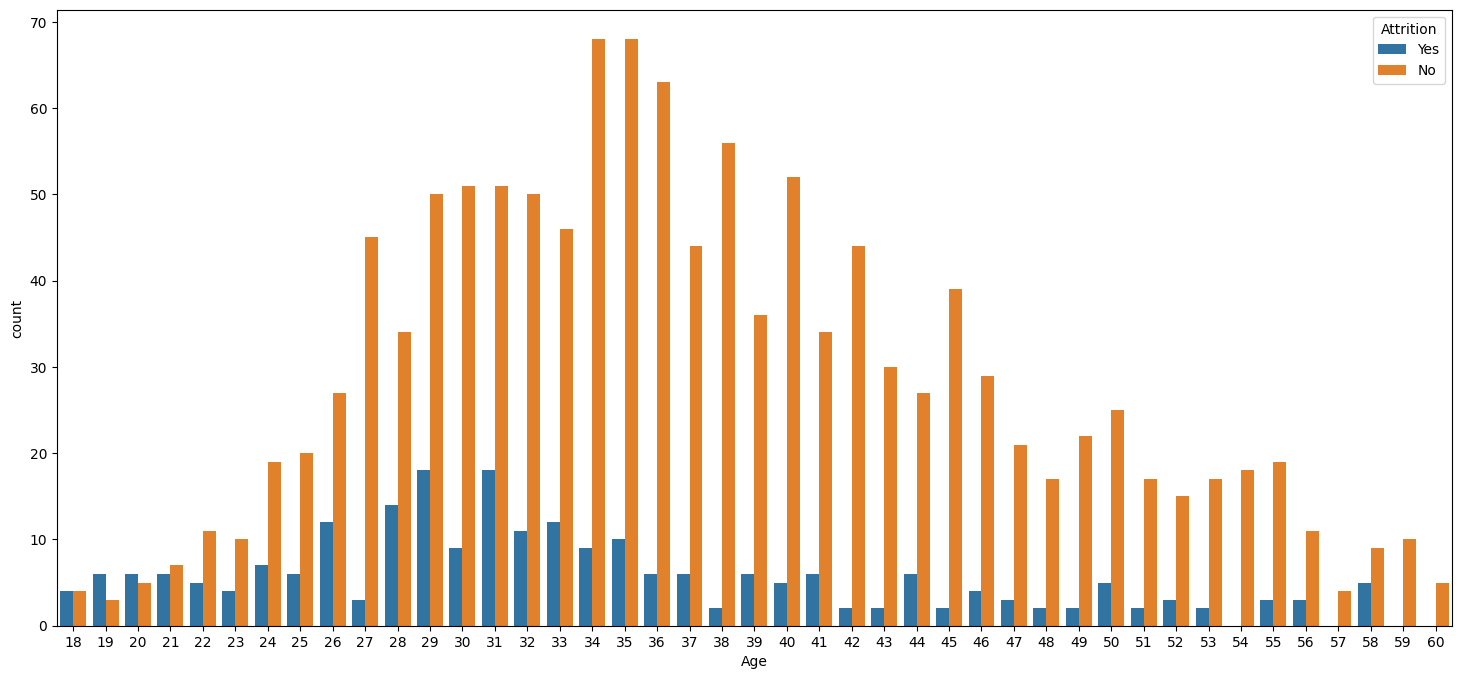

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='Age',hue='Attrition',data=df)    # at age 29  and 31 of the employee will left the company

In [ ]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<Axes: xlabel='BusinessTravel', ylabel='count'>

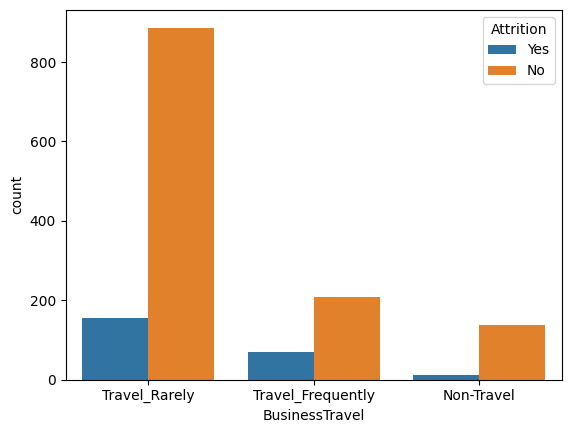

In [ ]:
sns.countplot(x='BusinessTravel', hue='Attrition',data=df)

<Axes: xlabel='Department', ylabel='count'>

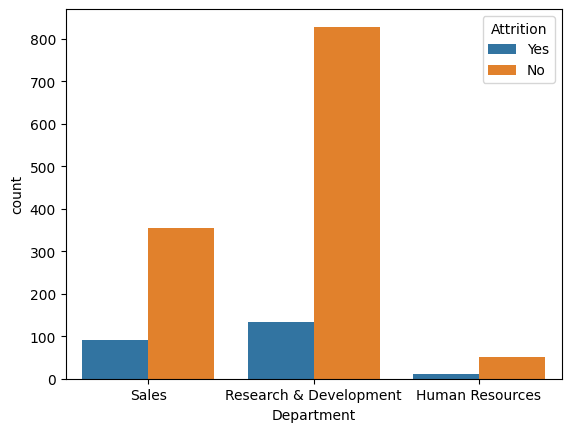

In [ ]:
sns.countplot(x='Department', hue='Attrition',data=df)

<Axes: xlabel='EducationField', ylabel='count'>

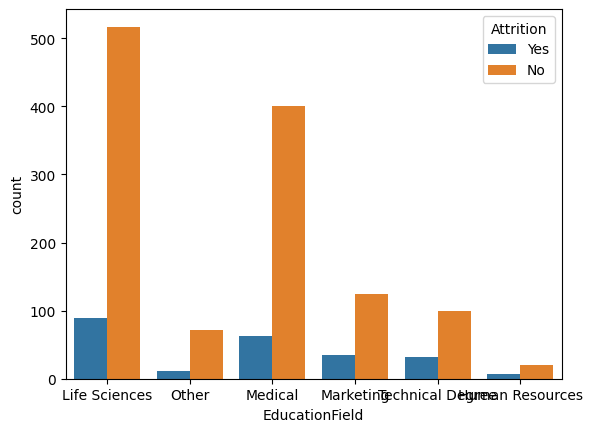

In [ ]:
sns.countplot(x='EducationField', hue='Attrition',data=df)

<Axes: xlabel='JobRole', ylabel='count'>

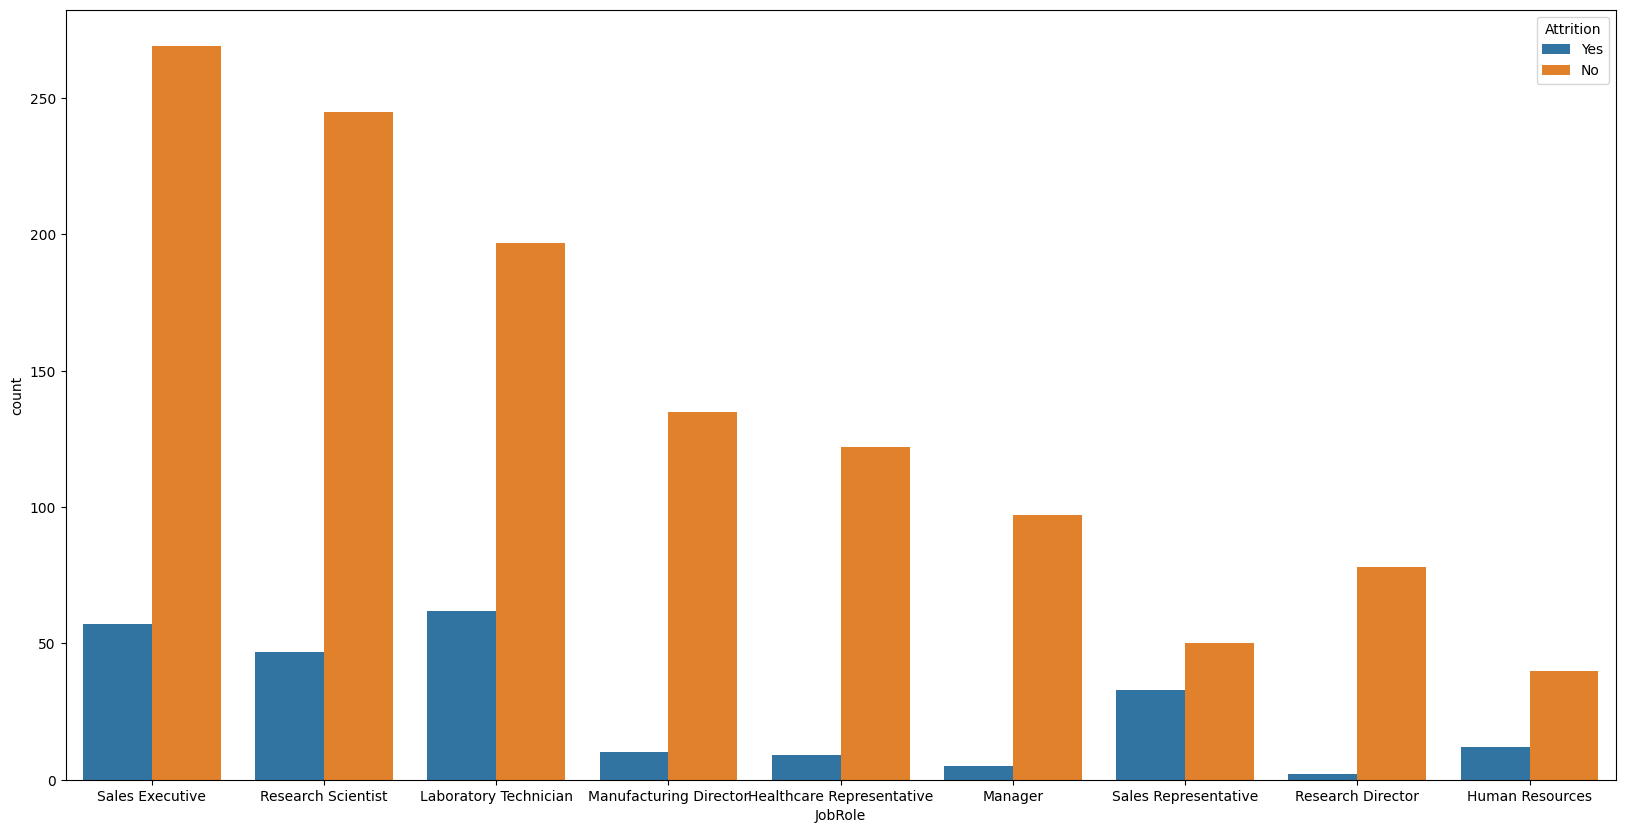

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobRole', hue='Attrition',data=df)

<Axes: xlabel='Gender', ylabel='count'>

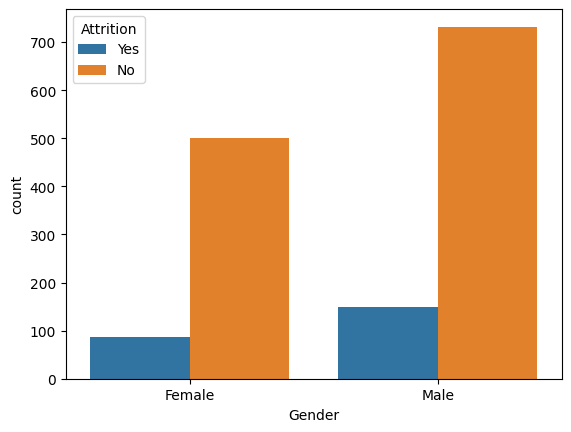

In [ ]:
sns.countplot(x='Gender', hue='Attrition',data=df)

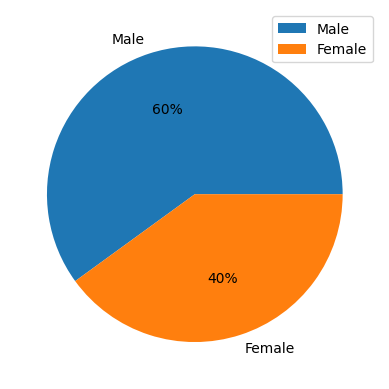

In [ ]:
gender = df['Gender'].value_counts()


# Plotting the pie chart
plt.pie(gender.values, labels=gender.index, autopct='%.0f%%')

plt.legend()
# Display the pie chart
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

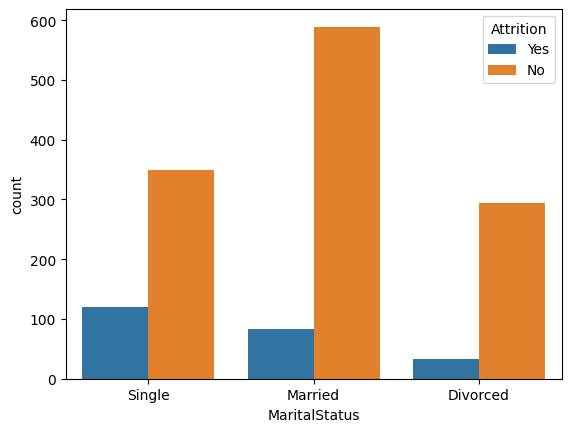

In [ ]:
sns.countplot(x='MaritalStatus', hue='Attrition',data=df)

<Axes: xlabel='OverTime', ylabel='count'>

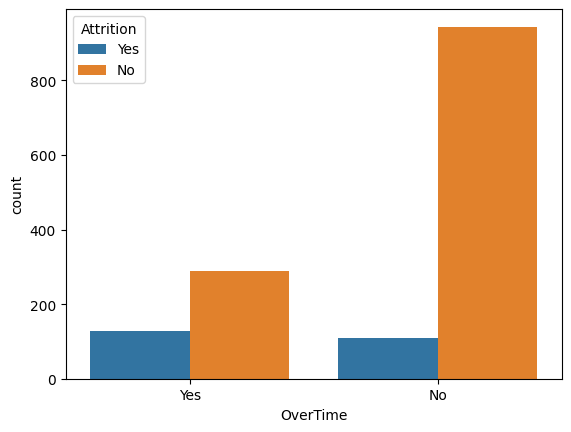

In [ ]:
sns.countplot(x='OverTime', hue='Attrition',data=df)

In [ ]:
#print all the datatypes and unique values
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) +' : '+ str(df[column].unique()))
    print(df[column].value_counts())
    print('------------------------------------')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------------
JobR

In [ ]:
#print all the datatypes and unique values
for column in df.columns:
  if df[column].dtype == int:
    print(str(column) +' : '+ str(df[column].unique()))
    print(df[column].value_counts())
    print('------------------------------------')

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
------------------------------------
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  

In [ ]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<ipython-input-27-c41bc5737e1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='2f',cmap='coolwarm')


<Axes: >

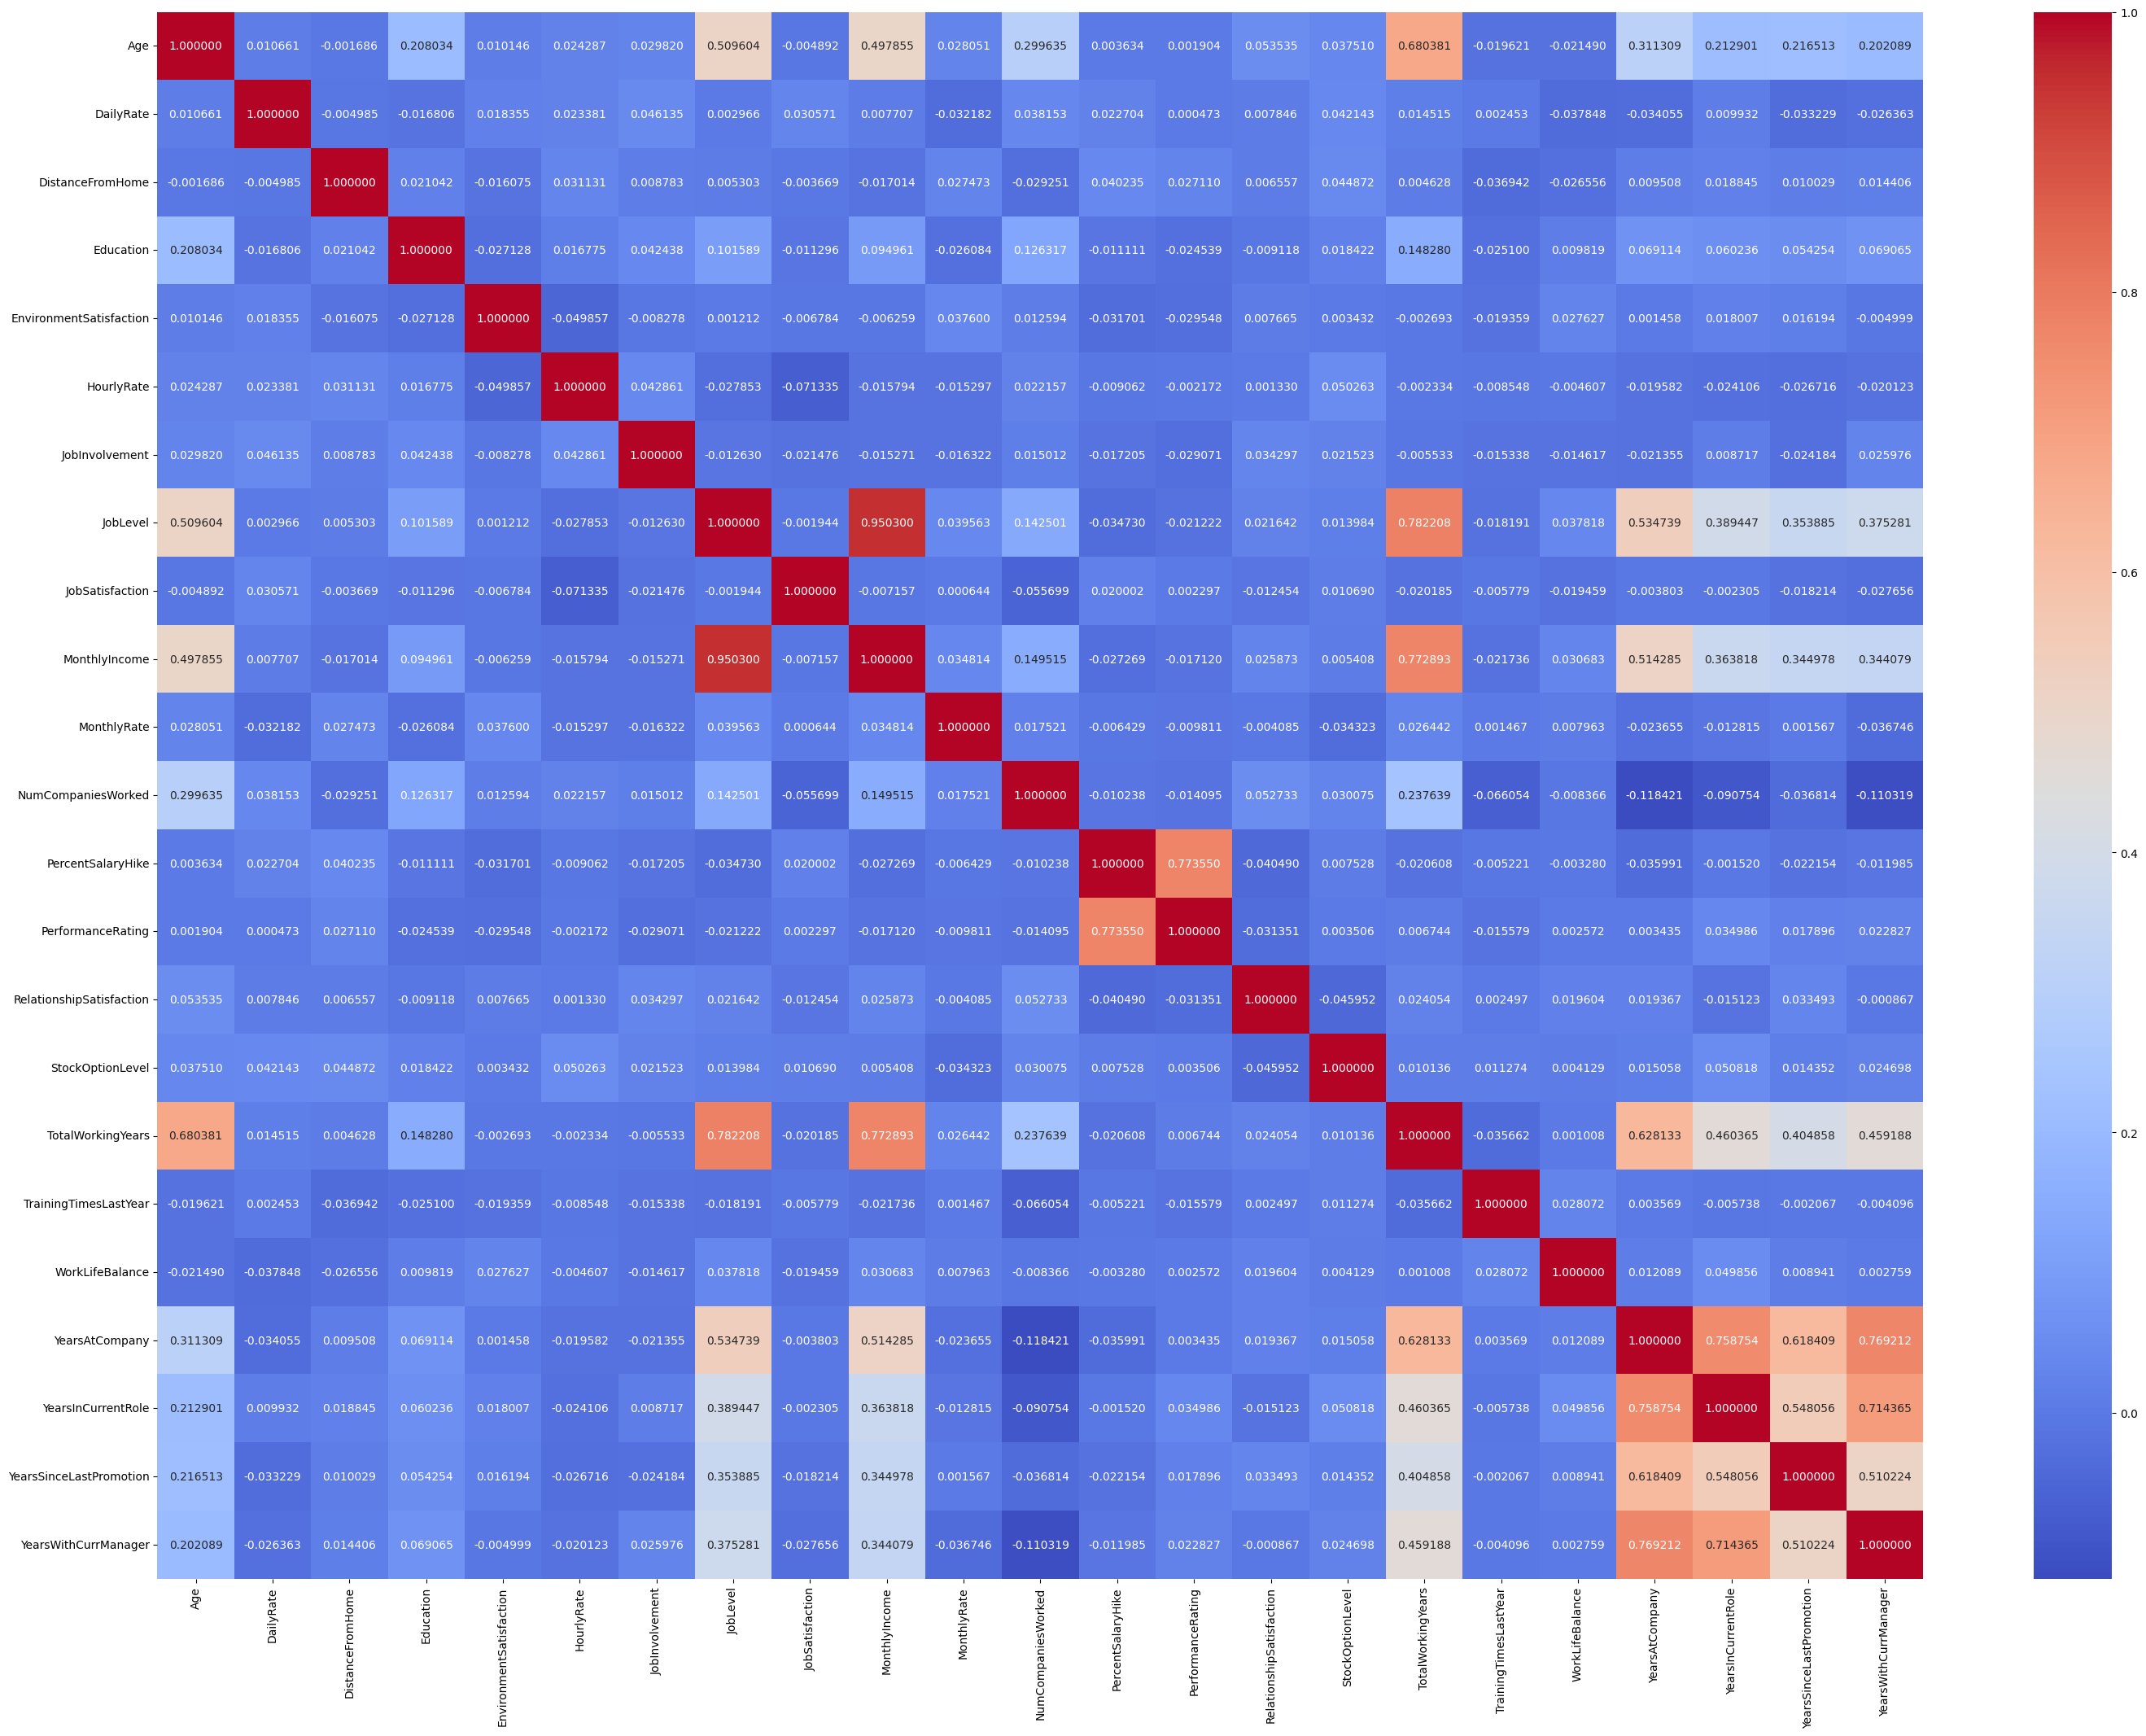

In [ ]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),annot=True,fmt='2f',cmap='coolwarm')

In [ ]:
# Transform data from  categories into numerical

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  else:
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-28-e604d97e5785>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-28-e604d97e5785>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-28-e604d97e5785>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-28-e604d97e5785>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-28-e604d97e5785>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


In [ ]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.472198,0.028362,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.196165,0.015273,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.025095,-0.014115,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,0.022916,0.046072,0.003355,-0.009127,0.030712,-0.069527,0.015784,-0.032051,0.037304,0.008902,0.022339,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.157526,0.023898,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,0.011962,0.028298,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.124561,-0.025694,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.044306,-0.026343,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.015259,0.037545,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.044121,-0.041786,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


<Axes: >

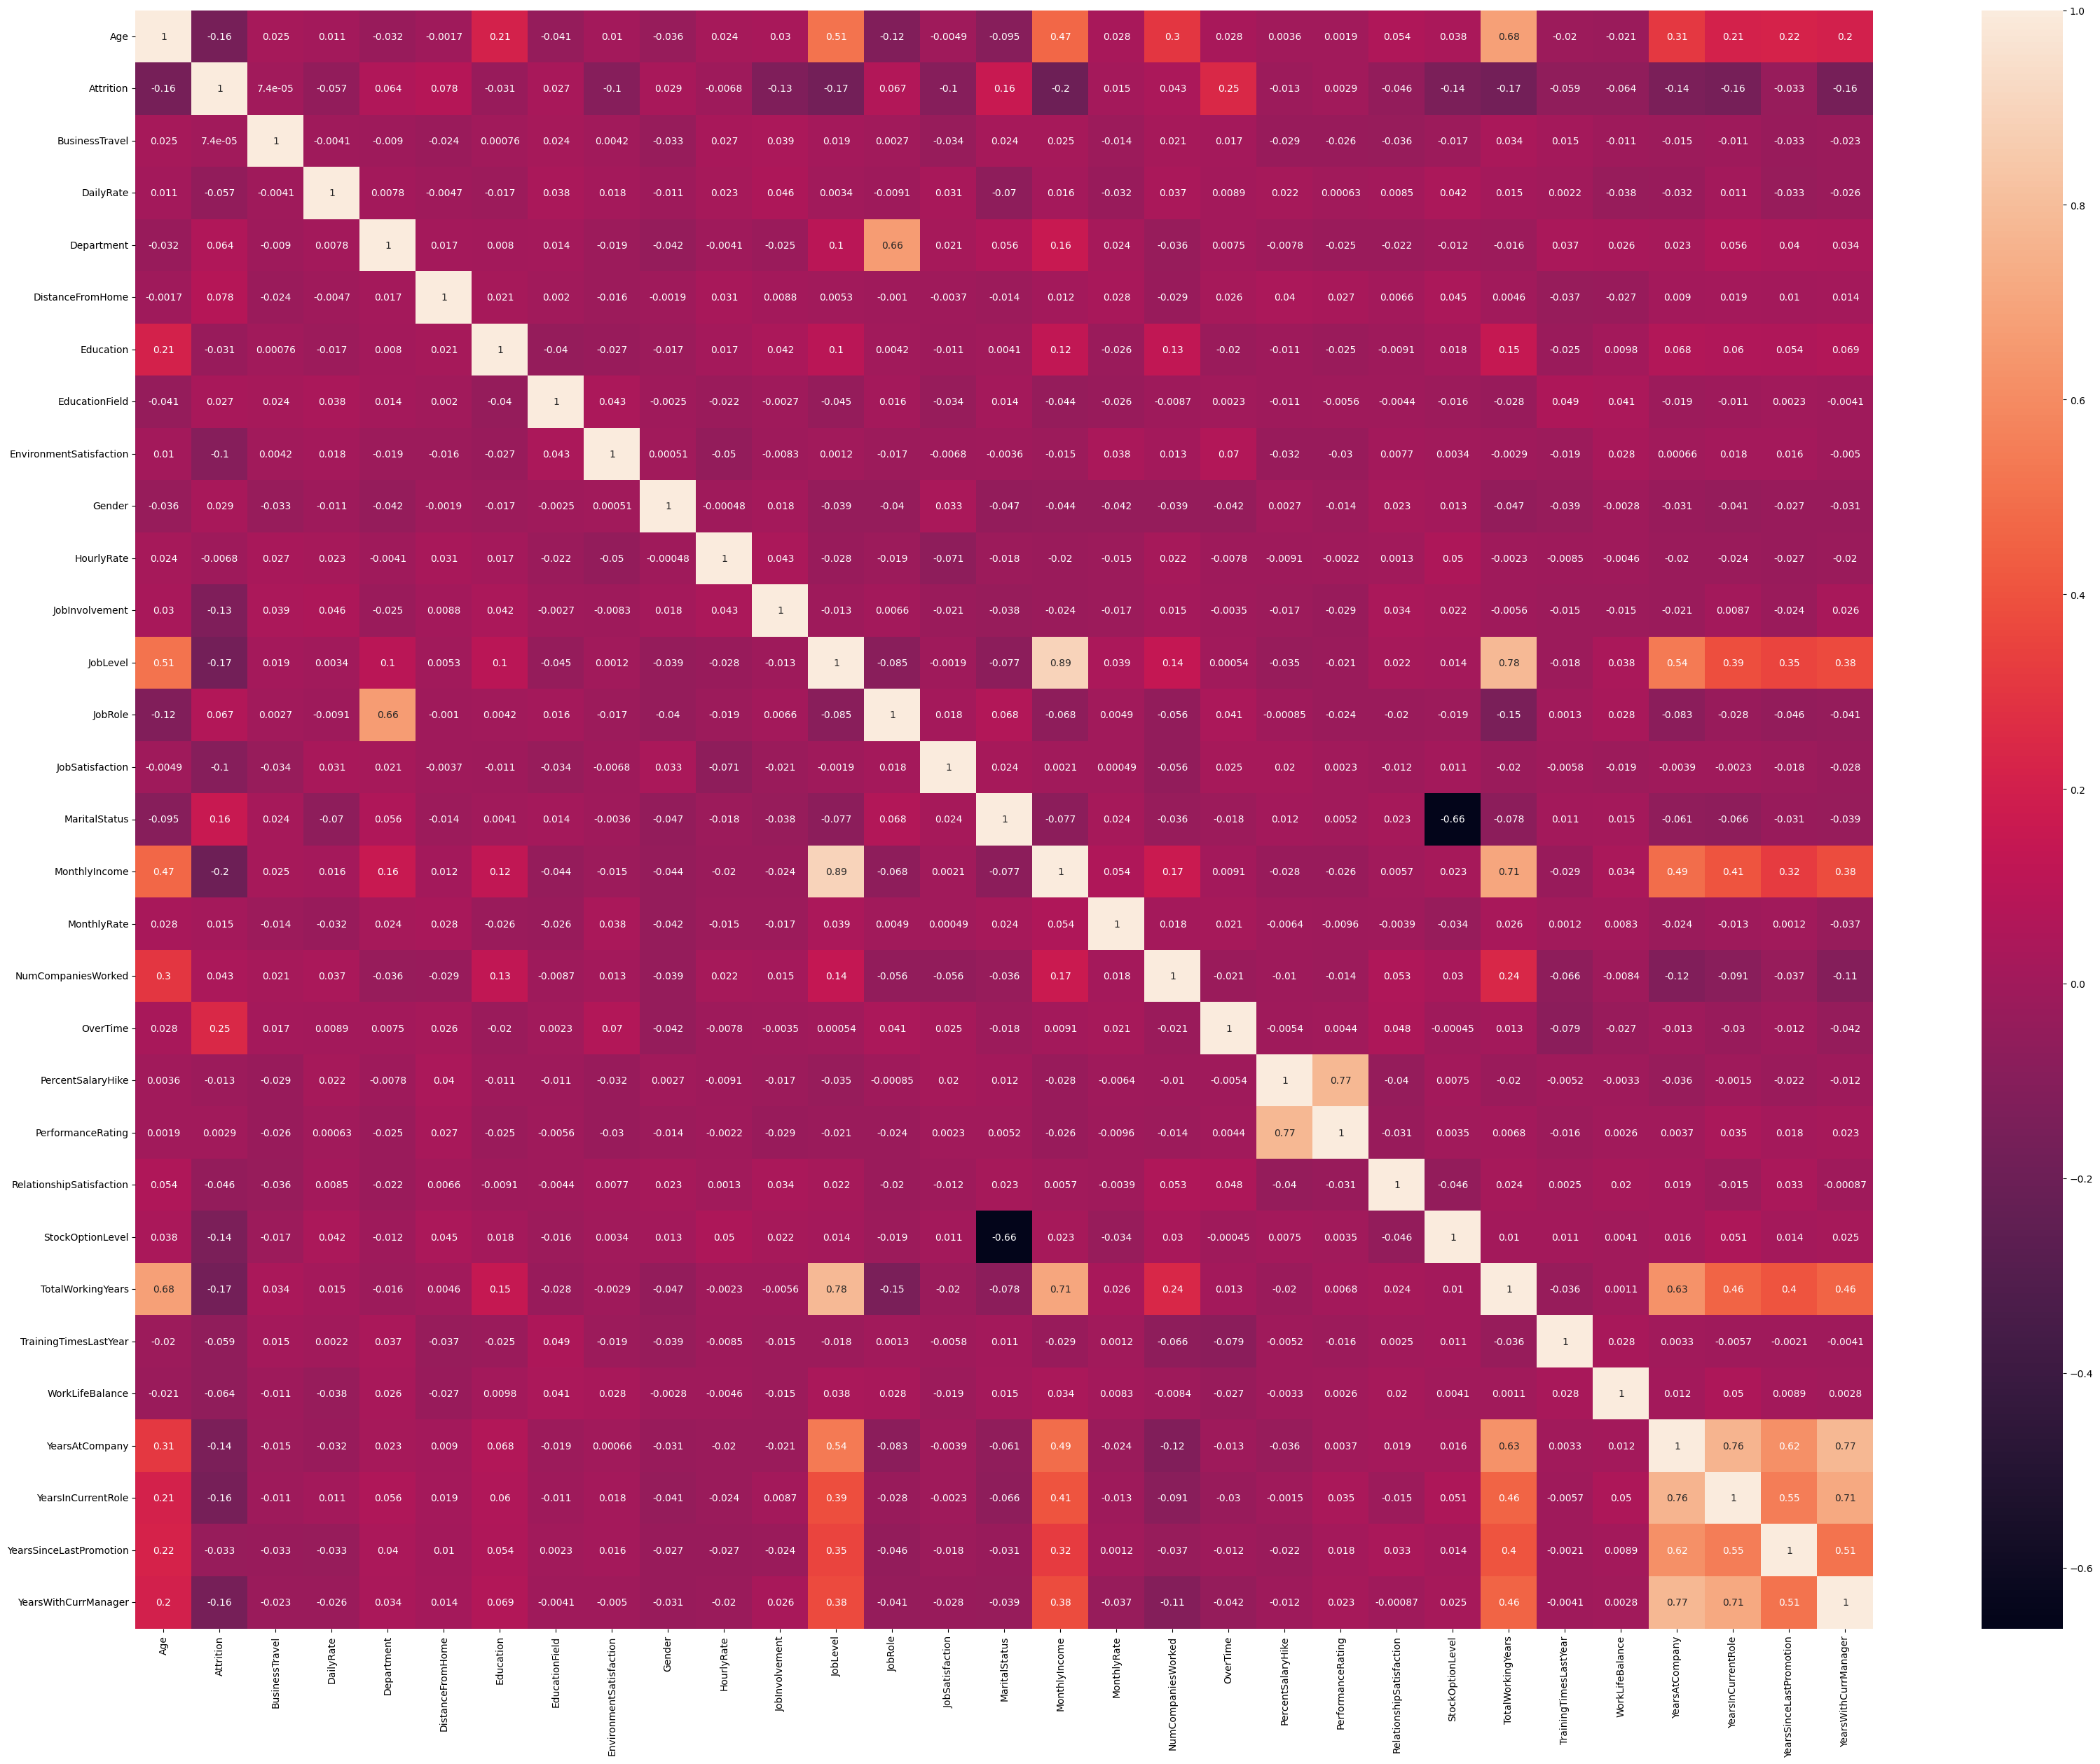

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#create a new table

df['AgeYear']= df['Age']


In [ ]:
#Remove the age columns
df.drop('Age',axis =1,inplace=True)


In [ ]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeYear
0,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,9


In [ ]:
#1.Split into features and target
x = df.iloc[:,1:-1].values
x[:3]

array([[   2,  624,    2,    0,    1,    1,    1,    0,   64,    2,    1,
           7,    3,    2,  809,  999,    8,    1,    0,    0,    0,    0,
           8,    0,    0,    6,    4,    0,    5],
       [   1,  113,    1,    7,    0,    1,    2,    1,   31,    1,    1,
           6,    1,    1,  682, 1328,    1,    0,   12,    1,    3,    1,
          10,    3,    2,   10,    7,    1,    7],
       [   2,  805,    1,    1,    1,    4,    3,    1,   62,    1,    0,
           2,    2,    2,   62,   18,    6,    1,    4,    0,    1,    0,
           7,    3,    2,    0,    0,    0,    0]])

In [ ]:
y= df['Attrition'].values
y[:3]

array([1, 0, 1])

In [ ]:
#2.Feature scaling
from sklearn.preprocessing import StandardScaler

x=StandardScaler().fit_transform(x)
x[:3]

array([[ 0.59004834,  0.71391447,  1.40151234, -1.01090934, -0.89168825,
        -0.93741369, -0.66053067, -1.22474487,  1.38313827,  0.37967213,
        -0.05778755,  1.03271569,  1.15325359,  1.23682046,  0.39619957,
         0.70381381,  2.12513592,  1.59174553, -1.1505541 , -0.42623002,
        -1.58417824, -0.93201439, -0.42173528, -2.17198183, -2.49382042,
        -0.16380132, -0.0632959 , -0.67914568,  0.24583399],
       [-0.91319439, -1.30244563, -0.49381714, -0.14714972, -1.86842575,
        -0.93741369,  0.25462493,  0.81649658, -0.24067677, -1.02616674,
        -0.05778755,  0.62637413, -0.66085318, -0.13328208,  0.06940149,
         1.50296454, -0.67804939, -0.62824112,  2.12930601,  2.34615106,
         1.19143799,  0.24198831, -0.16444088,  0.15570708,  0.33809616,
         0.49724999,  0.76499762, -0.36871529,  0.80654148],
       [ 0.59004834,  1.42812421, -0.49381714, -0.88751511, -0.89168825,
         1.31667267,  1.16978053,  0.81649658,  1.28472523, -1.02616674,
  

In [ ]:
#3.Split into training and testing set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

print(x_train.shape,x_test.shape)

(1029, 29) (441, 29)


In [ ]:
#import the libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Model Selection

1.comparing the models with default hyperparameter values using Cross Validation

In [ ]:
#list of the models
models =[LogisticRegression(max_iter=1000),SVC(kernel='rbf'),SVC(kernel='linear'),KNeighborsClassifier(),DecisionTreeClassifier( criterion = "gini",random_state=42),RandomForestClassifier(random_state=42)]

In [ ]:
def compare_models_cross_validation():

  for model in models:
    cv_score = cross_val_score(model,x,y,cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy= round(mean_accuracy*100,2)

    print('Cross validation:',model,'=',cv_score)
    print('Accuracy:',model,'=',mean_accuracy,'%')
    print('------------------------------------')

In [ ]:
compare_models_cross_validation()

Cross validation: LogisticRegression(max_iter=1000) = [0.88095238 0.85714286 0.86394558 0.87414966 0.86394558]
Accuracy: LogisticRegression(max_iter=1000) = 86.8 %
------------------------------------
Cross validation: SVC() = [0.8537415  0.85034014 0.87414966 0.86054422 0.88095238]
Accuracy: SVC() = 86.39 %
------------------------------------
Cross validation: SVC(kernel='linear') = [0.8707483  0.86394558 0.86394558 0.8707483  0.88095238]
Accuracy: SVC(kernel='linear') = 87.01 %
------------------------------------
Cross validation: KNeighborsClassifier() = [0.84013605 0.83673469 0.84693878 0.84353741 0.84693878]
Accuracy: KNeighborsClassifier() = 84.29 %
------------------------------------
Cross validation: DecisionTreeClassifier(random_state=42) = [0.76870748 0.75510204 0.81972789 0.76190476 0.82312925]
Accuracy: DecisionTreeClassifier(random_state=42) = 78.57 %
------------------------------------
Cross validation: RandomForestClassifier(random_state=42) = [0.8537415  0.85714286 

2. Comparing the models with different Hyperparameter values using GridSearch CV

In [ ]:
#list of the models
models_list =[LogisticRegression(max_iter=10000),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42)]

In [ ]:
#Create a dictionary that contain hyperparameter values for the above mentioned models

model_hyperparameters = {


    'log_reg_hyperparameters':{

        'C':[1,3,5,7]
    },

    'svc_hyperparameters':{

        'kernel': ['linear','rbf','poly','sigmoid'],
        'C':[1,3,5,7]
    },

    'KNN_hyperparameters':{

      'n_neighbors':[1,2,3,4,5,6]

    },

    'Decision_hyperparameters':{

       'max_depth' :[1,3,5,7]

    },

    'Random_hyperparameters':{

     'n_estimators': [10, 20, 50, 100]
    }

}

In [ ]:
model_hyperparameters.values()

dict_values([{'C': [1, 3, 5, 7]}, {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 3, 5, 7]}, {'n_neighbors': [1, 2, 3, 4, 5, 6]}, {'max_depth': [1, 3, 5, 7]}, {'n_estimators': [10, 20, 50, 100]}])

In [ ]:
model_keys=list(model_hyperparameters.keys())
model_keys

['log_reg_hyperparameters',
 'svc_hyperparameters',
 'KNN_hyperparameters',
 'Decision_hyperparameters',
 'Random_hyperparameters']

applying Gridsearchcv

In [ ]:
def ModelSelection(list_of_models,hyperparameter_dictonary):

  result = []

  i= 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameter_dictonary[key]

    i += 1

    print(model)

    print(params)

    classifier = GridSearchCV(model,params,cv=5)

    classifier.fit(x,y)

    result.append({
        'model used': model,
        'highest_score': classifier.best_score_,
        'best hyperparameter': classifier.best_params_
    })
  result_dataframe =pd.DataFrame(result,columns =['model used','highest_score','best hyperparameter'])

  return result_dataframe

In [ ]:
 ModelSelection(models_list,model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 3, 5, 7]}
SVC()
{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 3, 5, 7]}
KNeighborsClassifier()
{'n_neighbors': [1, 2, 3, 4, 5, 6]}
DecisionTreeClassifier(random_state=42)
{'max_depth': [1, 3, 5, 7]}
RandomForestClassifier(random_state=42)
{'n_estimators': [10, 20, 50, 100]}


,model used,highest_score,best hyperparameter
0,LogisticRegression(max_iter=10000),0.868027,{'C': 1}
1,SVC(),0.874150,"{'C': 3, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.843537,{'n_neighbors': 6}
3,DecisionTreeClassifier(random_state=42),0.853061,{'max_depth': 3}
4,RandomForestClassifier(random_state=42),0.858503,{'n_estimators': 100}


In [ ]:
# using SVC

svm = SVC(kernel='rbf', C=3)
svm.fit(x_train,y_train)
y_predict_svm = svm.predict(x_test)
svm_accuracy= accuracy_score(y_test,y_predict_svm)
print('Accuracy SVM :', svm_accuracy*100)

Accuracy SVM : 87.98185941043084


In [ ]:
cm_svm = confusion_matrix(y_test,y_predict_svm)
cr_svm = classification_report(y_test,y_predict_svm)

print('Cm SVM',cm_svm)
print('-----------------------------------------------')
print('Classification',cr_svm)

Cm SVM [[363   8]
 [ 45  25]]
-----------------------------------------------
Classification               precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.76      0.36      0.49        70

    accuracy                           0.88       441
   macro avg       0.82      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441



<Axes: >

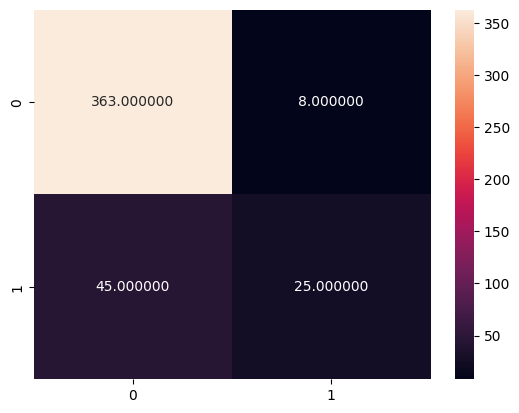

In [ ]:
sns.heatmap(cm_svm,annot=True,fmt='2f')

In [ ]:
#4.Model alogorithms
# use Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators= 100, criterion= "entropy", random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_predict_forest= forest.predict(x_test)
forest_accuracy= accuracy_score(y_test,y_predict_forest)

print('Accuracy:',forest_accuracy)

Accuracy: 0.8684807256235828


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(y_test,y_predict_forest)
cr= classification_report(y_test,y_predict_forest)

print(cm)
print('-------------')
print(cr)

[[370   1]
 [ 57  13]]
-------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       371
           1       0.93      0.19      0.31        70

    accuracy                           0.87       441
   macro avg       0.90      0.59      0.62       441
weighted avg       0.88      0.87      0.83       441



<Axes: >

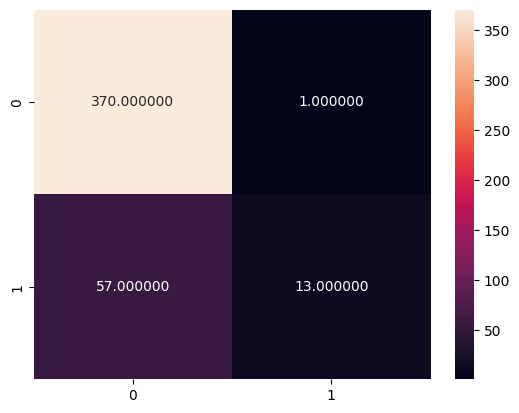

In [ ]:
sns.heatmap(cm,annot=True, fmt='2f')